# EDA with python and applying logistic regression

for this lecture we will be working with the titanic data sheet kaggle this is bvery famous data set and very often is a student's first step in machine learning

well be trying to predict a classification-survival or deceased lets begin our understanding of implementing logistic regression in python for classification


well use a semi cleaned version of the titanic data set if you use the data set hosted directly on kaggle you may need to do some additional cleaning not shown in this lecture notebook

# important libraries

let import some librarie to get started

In [137]:
import numpy as np#(is usually used to work with arrays)
import pandas as pd#(it helps me to read the data set)
import matplotlib.pyplot as plt#(it will be used for visualization)
import seaborn as sns#(it will be used for visualization)
%matplotlib inline


# the data
lets start by reading in the titanic_train.csv file into a pandas dataframe


In [138]:
train=pd.read_csv('train.csv')

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# exploratory data analysis

lets begin some exploratory data analyst well start by checking out missing data

#missing data

we can use sea born to create simplke heatmap to see where is missing data


In [140]:
train.isnull()# helps to finds out whether each and every rows is true or false if its is true that means its value is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [141]:
# its is not the good way to see values like this we use a visualization concept we learn in seaborn library


<AxesSubplot:>

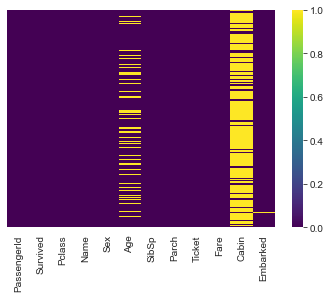

In [142]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

# all null values shown in yellow colour most of the nan values present in age and cabin


roughly 20 percent of the age data is missing the proportion of age missing is likely small enough for reasonable replacemnts with some form of imputations looking at the cabin column it looks like we are just missing to much of that data to do something usefull with at a basic level well probably drop this later or change it to another feature like cabin known 1 or 0

lets continue on by visualizing some more of the data check out the video for full explanations over these plots this code is just to serve as reference 

<AxesSubplot:xlabel='Survived', ylabel='count'>

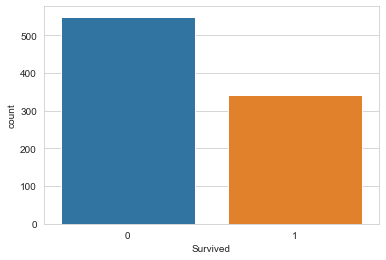

In [143]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

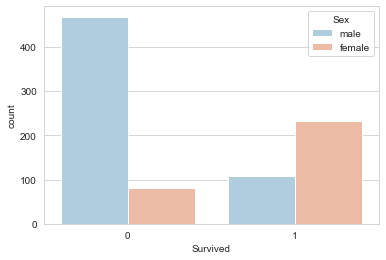

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

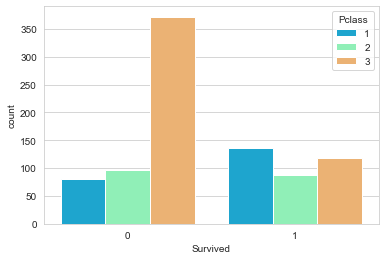

In [145]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')


C:\Users\vishal nimesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

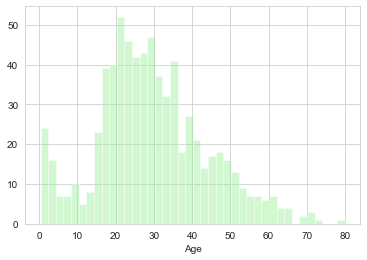

In [146]:
sns.distplot(train['Age'].dropna(),kde=False,color="lightgreen",bins=40)

<AxesSubplot:xlabel='Age'>

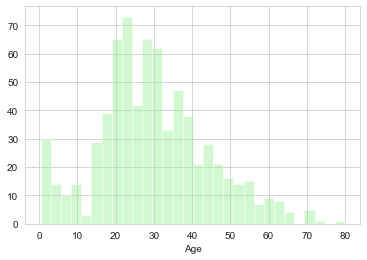

In [147]:
sns.distplot(train['Age'].dropna(),kde=False,color="lightgreen",bins=30)

<AxesSubplot:>

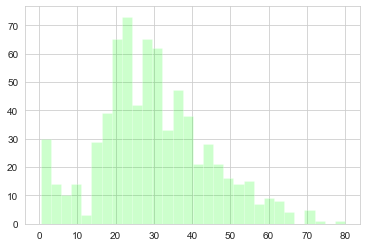

In [148]:
##we can use also .hist it is same as distplot
train['Age'].hist(bins=30,color='Lime',alpha=0.2)

<AxesSubplot:>

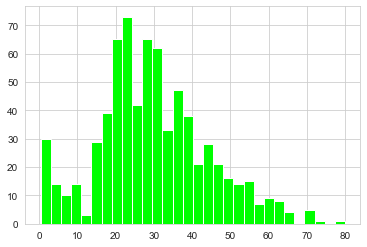

In [149]:
train['Age'].hist(bins=30,color='Lime')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

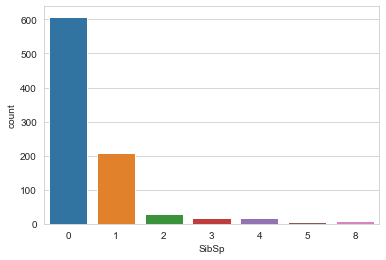

In [150]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

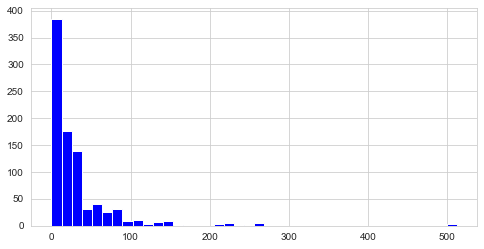

In [151]:
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

# data cleaning
we want to fill in missing age data instead of just dropping the missing age data rows. onw way to do this is by filling int the mean age of all the passenger (imputation) however we can be smarter about this and check the  average age by passenger class for example

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

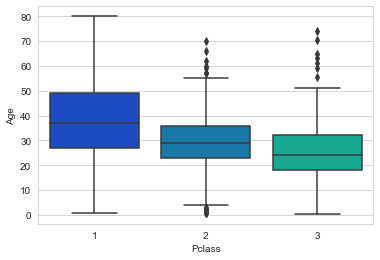

In [152]:

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

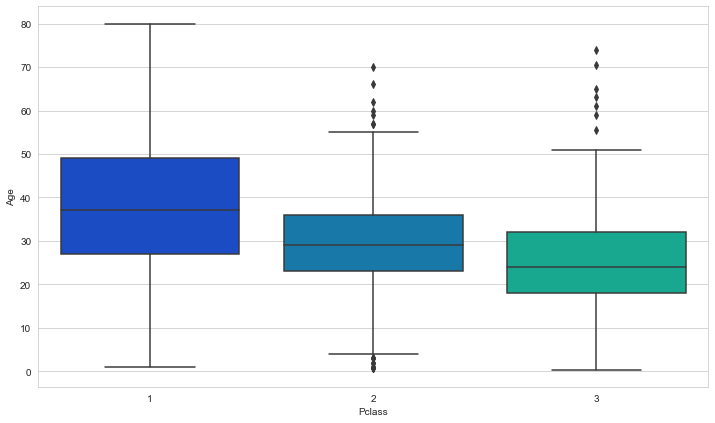

In [153]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

we can see the wealthier passenger in the higher classes tend to be order which make sense well use this average age values to to impute based on pclass for age

In [154]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

now apply that function

In [155]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

now lets check that heat map again

<AxesSubplot:>

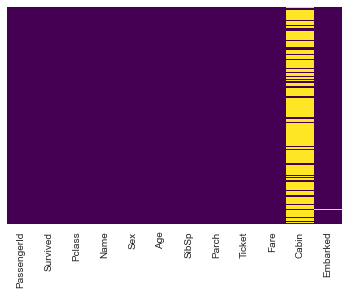

In [156]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

great lets go ahead and drop the cabin column and the row is embarked that is NaN


In [157]:
train.drop('Cabin',axis=1,inplace=True)


In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

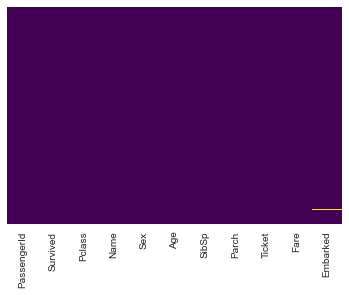

In [159]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now all null values replaced by our given values which is give in line in[75]

In [160]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# converting categorical features

well need to convert categorical features to dummy variables using pandas otherwise our machine learning algorith wont be able to directly take in those features as input


In [161]:
pd.get_dummies(train['Embarked'],drop_first=True).head#it see upper 3 values jab dekha humne upar hume teen column mai alag alag mila embark mai but sex mai huya kya hmes do mile khali male female female same aagya tho do hi ginenge

<bound method NDFrame.head of      Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]>

In [162]:
pd.get_dummies(train['Sex'],drop_first=True).head

<bound method NDFrame.head of      male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]>

In [163]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [164]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [165]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# now we see we drop these 4 factors

In [167]:
#we use concat uss dato ko jo humne catoegorical mai kra hai use yha lane kai liye
train=pd.concat([train,sex,embark],axis=1)

In [168]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


great our data is ready for our model

#building a logistic regression model

lets start by spelling our data into training set (there is another test.csv file that you can play around in case you want to use all this data for training)


#train test split

In [170]:
train.drop('Survived',axis=1).head()# survive is a depemd festure on male

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [172]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64